# Visualising Audio Data

In this short notebook, we will adapt Luke Hande's tutorial on ["How to Visualize Sound in Python"](https://learnpython.com/blog/plot-waveform-in-python/) - available [here](https://learnpython.com/blog/plot-waveform-in-python/).

We will first load all of the libraries to use in this demonstration:

In [1]:
import wave
import numpy as np
import matplotlib.pyplot as plt

## Step 1. Loading the Data and Analysing the Audio

Due to Kaggle's notebook limitations, we load one of the smaller audio files. Within the dataset, Margot Robbie's speech is the shortest - the clip is 1:19 in length and around 13mb in size. 

We will also do some analysis. This includes extracting information such as the sample frequency, the number of samples, the length of the audio in seconds, and finally the number of channels. 

We also generate the NumPy array here since Kaggle seems to lose the data sometimes.

Finally, we will split the audio into the two stereo channels.

In [3]:
margot_robbie_speech = wave.open('../../data/deep-voice/KAGGLE/AUDIO/REAL/margot-original.wav', 'rb')
print(margot_robbie_speech)

sample_freq = margot_robbie_speech.getframerate()
n_samples = margot_robbie_speech.getnframes()
t_audio = n_samples/sample_freq
n_channels = margot_robbie_speech.getnchannels()

print("The samping rate of the audio file is " + str(sample_freq) + "Hz, or " + str(sample_freq/1000) + "kHz")
print("The audio contains a total of " + str(n_samples) + " frames or samples")
print("The length of the audio file is " + str(t_audio) + " seconds")
print("The audio file has " + str(n_channels) + " channels.\n")



signal_wave = margot_robbie_speech.readframes(n_samples)
signal_array = np.frombuffer(signal_wave, dtype=np.int16)


print("The signal contains a total of " + str(signal_array.shape[0]) + " samples.")
print("If this value is greater than " + str(n_samples) + " it is due to there being multiple channels")
print("E.g. - Samples * Channels = " + str(n_samples*n_channels))

# Split the channels
l_channel = signal_array[0::2]
r_channel = signal_array[1::2]

The samping rate of the audio file is 44100Hz, or 44.1kHz
The audio contains a total of 3505385 frames or samples
The length of the audio file is 79.48718820861679 seconds
The audio file has 2 channels.

The signal contains a total of 7010770 samples.
If this value is greater than 3505385 it is due to there being multiple channels
E.g. - Samples * Channels = 7010770


## Step 2. Signal Amplitude

We will now plot the signal amplitude over time for both channels. 

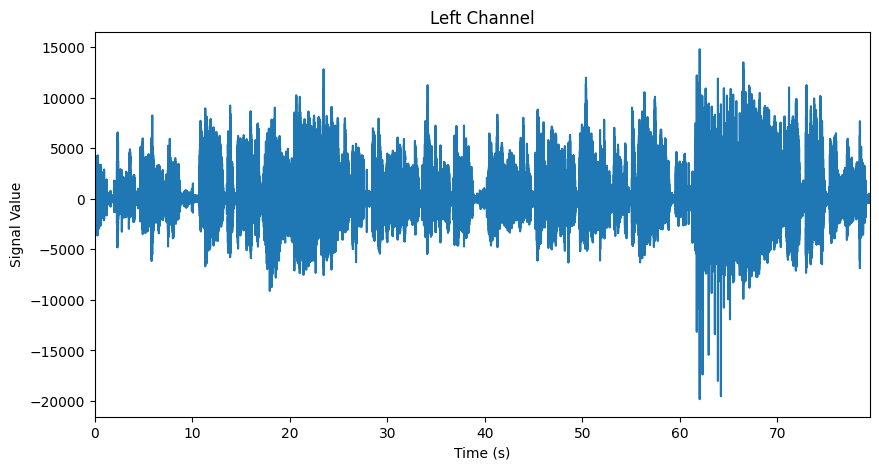

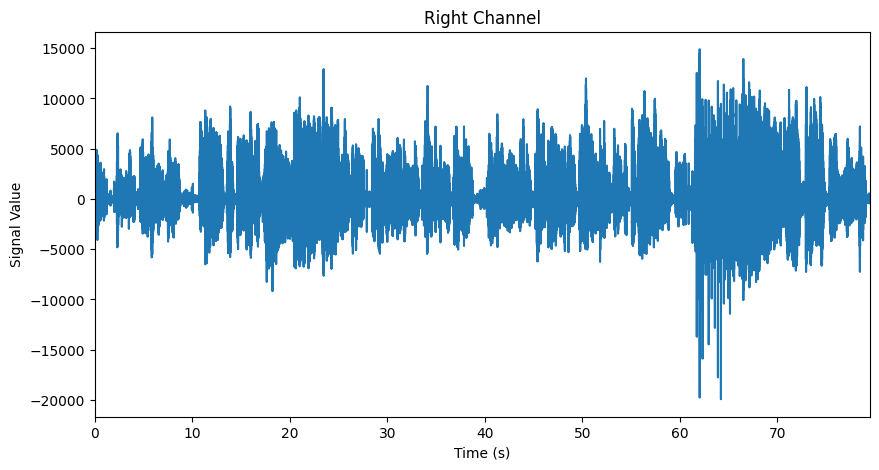

In [4]:
timestamps = np.linspace(0, n_samples/sample_freq, num=n_samples)


plt.figure(figsize=(10, 5))
plt.plot(timestamps, l_channel)
plt.title('Left Channel')
plt.ylabel('Signal Value')
plt.xlabel('Time (s)')
plt.xlim(0, t_audio)
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(timestamps, r_channel)
plt.title('Right Channel')
plt.ylabel('Signal Value')
plt.xlabel('Time (s)')
plt.xlim(0, t_audio)
plt.show()

## Step 3. Frequency Spectrum/Spectrogram

Now let's take a look at the frequencies. To plot this, we will use the sample frequencies which we extracted earlier.

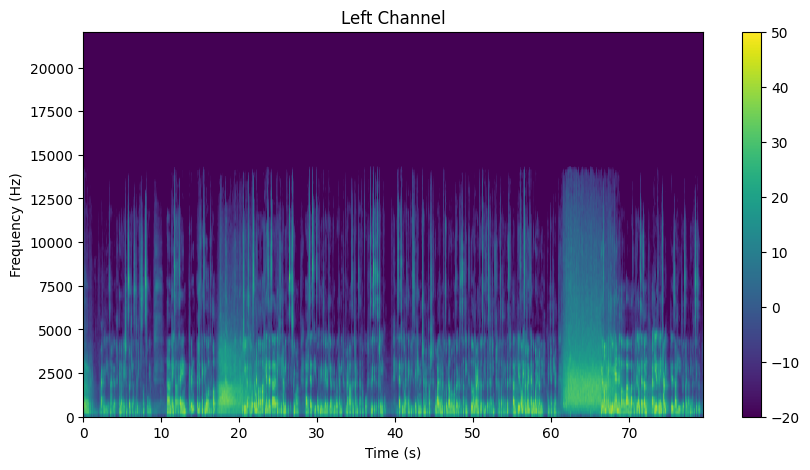

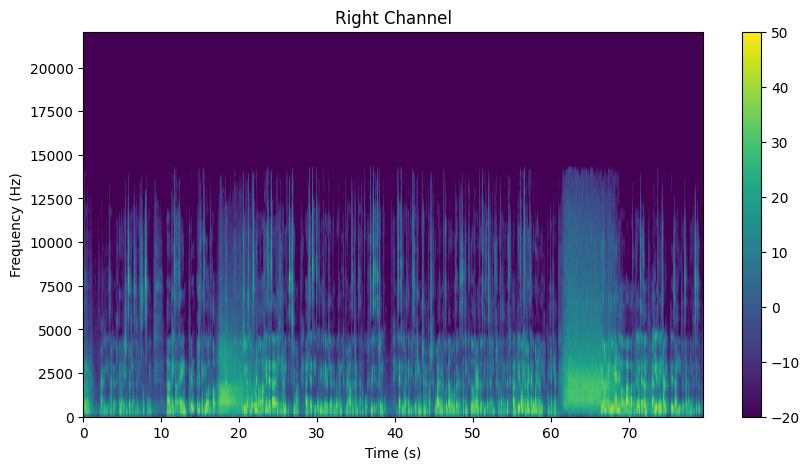

In [5]:
plt.figure(figsize=(10, 5))
plt.specgram(l_channel, Fs=sample_freq, vmin=-20, vmax=50)
plt.title('Left Channel')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (s)')
plt.xlim(0, t_audio)
plt.colorbar()
plt.show()

plt.figure(figsize=(10, 5))
plt.specgram(r_channel, Fs=sample_freq, vmin=-20, vmax=50)
plt.title('Right Channel')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (s)')
plt.xlim(0, t_audio)
plt.colorbar()
plt.show()

## Extra step: Comparing Real and Fake Audio

Now let's tie everything together and compare real and fake audio. We will repeat all steps now for the Margot Robbie speech and a fake version. The fake version is spoken by a Ryan Gosling model.

**Note:** see the generated graphs, can you notice some differences? While some of the signal is very similar, we can see some changes that may prove statistically significant. If they are, then features that describe these behaviours could be used for machine learning!

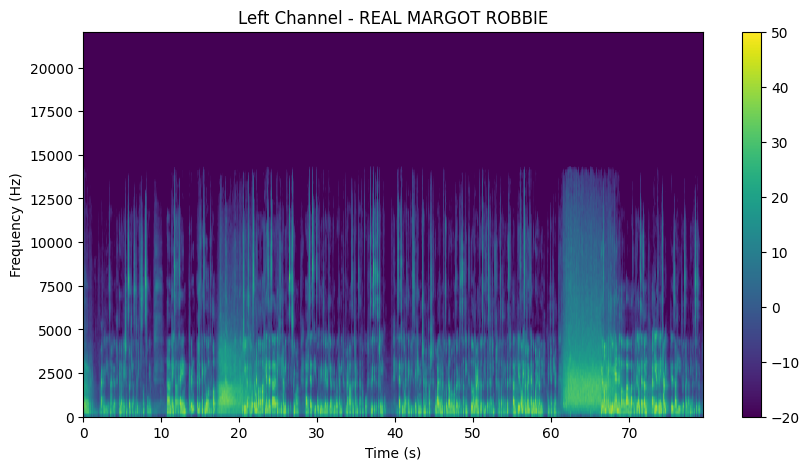

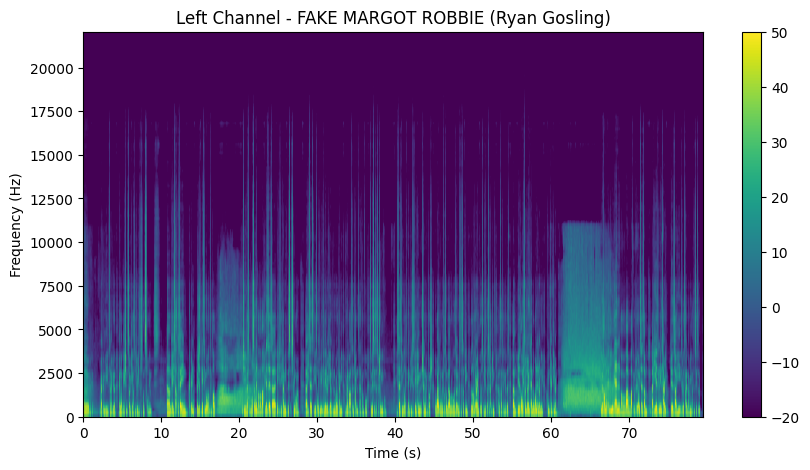

In [7]:
margot_robbie_fake_speech = wave.open('../../data/deep-voice/KAGGLE/AUDIO/FAKE/margot-to-ryan.wav', 'rb')
print(margot_robbie_fake_speech)

sample_freq_fake = margot_robbie_fake_speech.getframerate()
n_samples_fake = margot_robbie_fake_speech.getnframes()
t_audio_fake = n_samples/sample_freq
n_channels_fake = margot_robbie_fake_speech.getnchannels()

signal_wave_fake = margot_robbie_fake_speech.readframes(n_samples_fake)
signal_array_fake = np.frombuffer(signal_wave_fake, dtype=np.int16)


l_channel_fake = signal_array_fake[0::2]

plt.figure(figsize=(10, 5))
plt.specgram(l_channel, Fs=sample_freq, vmin=-20, vmax=50)
plt.title('Left Channel - REAL MARGOT ROBBIE')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (s)')
plt.xlim(0, t_audio)
plt.colorbar()
plt.show()

plt.figure(figsize=(10, 5))
plt.specgram(l_channel_fake, Fs=sample_freq_fake, vmin=-20, vmax=50)
plt.title('Left Channel - FAKE MARGOT ROBBIE (Ryan Gosling)')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (s)')
plt.xlim(0, t_audio_fake)
plt.colorbar()
plt.show()
